In [17]:
#### Import necessary modules and load data set###
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Load dataseet
wine = datasets.load_wine()
X_original=wine.data
scaler = StandardScaler().fit(X_original)
X = scaler.transform(X_original)
y=wine.target

In [18]:
## First try testing a model using holdout method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

logreg = LogisticRegression(max_iter = 3000, solver='newton-cg', multi_class='auto') #CV or not?
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# print the accuracy score
print('Holdout accuracy: ', accuracy_score(y_test, y_pred))
print('\n')
print('Classification report: ')
print(classification_report(y_test, y_pred))
print('Confusion report: ')
print(confusion_matrix(y_test, y_pred))

Holdout accuracy:  0.9814814814814815


Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Confusion report: 
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


In [19]:
## Second try testing a model using cross-validation
logreg_cv = LogisticRegression(max_iter = 1000, solver='newton-cg', multi_class='auto')

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

scores = cross_val_score(logreg_cv, X, y, cv=skf, scoring='accuracy')
predictions = cross_val_predict(logreg_cv, X, y, cv=skf)

# print all 5 times scores 
print('All scores:')
print(scores)

# then I will do the average about these five scores to get more accuracy score.
print('Cross-Validated accuracy: ', scores.mean())
print('\n')
print('Classification report: ')
print(classification_report(y, predictions))
print('Confusion report: ')
print(confusion_matrix(y, predictions))

All scores:
[0.97222222 0.97222222 0.97222222 1.         1.        ]
Cross-Validated accuracy:  0.9833333333333332


Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.99      0.97      0.98        71
           2       0.96      0.98      0.97        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178

Confusion report: 
[[59  0  0]
 [ 0 69  2]
 [ 0  1 47]]


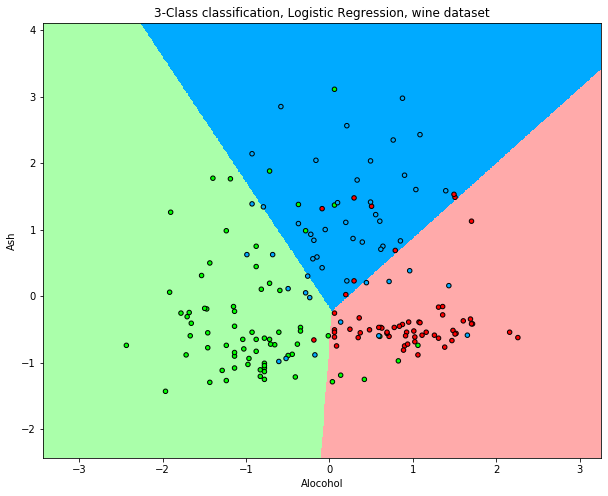

In [20]:
## Plot the decision boundaries for the first two features

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# build model and train the model
#logreg = LogisticRegression(max_iter = 1000)
#logreg.fit(X_train, y_train)
h = .01  # step size in the mesh

# calculate min, max and limits (x_min=length, y_min=width)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# build model with only two features to plot
logreg_2d = LogisticRegression(max_iter = 1000, solver='newton-cg', multi_class='auto') 
logreg_2d.fit(X_train[:, :2], y_train)

# get the predict values
y_pred_2d = logreg_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
y_pred_2d = y_pred_2d.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))

plt.pcolormesh(xx, yy, y_pred_2d, cmap=cmap_light)

#Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Alocohol')
plt.ylabel('Ash')
plt.title("3-Class classification, Logistic Regression, wine dataset")
plt.show()